<a href="https://colab.research.google.com/github/i-malur/programaria-analise-de-dados-com-python/blob/main/regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Filtramos da coluna de “QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?” todas as pessoas que marcaram a opção “Empregado (CLT)”.

Criamos uma coluna chamada “NÃO_BRANCA”, aonde, se na coluna de “COR/RACA/ETNIA” for “branca” essa coluna recebe 0, e caso contrário recebe 1.

Trabalhamos a coluna de “QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?” e usamos a função extract para pegar o primeiro dígito que aparece em cada opção dessa coluna. Aplicamos o mesmo para a coluna de “NÚMERO DE FUNCIONÁRIOS”.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados_atualizado = pd.read_csv('/content/drive/MyDrive/Programaria - Dados/analise_dados.csv')

In [ ]:
dados_atualizado.to_excel('/content/drive/MyDrive/Programaria - Dados/analise_dados_excel.xlsx', index=False)

In [ ]:
dados = pd.read_excel('/content/drive/MyDrive/Programaria - Dados/analise_dados_excel.xlsx')

In [ ]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2764
Empreendedor ou Empregado (CNPJ),410
"Desempregado, buscando recolocação",350
Estagiário,188
Servidor Público,156
Trabalho na área Acadêmica/Pesquisador,86
Somente Estudante (graduação),82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,46


In [ ]:
dados = dados[dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'] == 'Empregado (CLT)']

In [ ]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2764


In [ ]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,1807
Parda,661
Preta,181
Amarela,85
Prefiro não informar,16
Outra,10
Indígena,4


In [ ]:
lista_retirar = ['Prefiro não informar','Outra','Indígena']

In [ ]:
dados = dados[~dados['COR/RACA/ETNIA'].isin(lista_retirar)]

In [ ]:
dados['NÃO BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x!= 'Branca' else 0)

In [ ]:
dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].value_counts()

,count
QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,
de 1 a 2 anos,743
de 3 a 4 anos,584
de 4 a 6 anos,416
Menos de 1 ano,353
Mais de 10 anos,279
de 7 a 10 anos,232
Não tenho experiência na área de dados,127


> str.extract

O R, antes das aspas, indica uma string crua, uma string na raiz, onde
caracteres especiais são tratados literalmente. Isso é útil para evitar confusão com caracteres de escape em expressões regulares. O barra invertido D, este é um metacaractere, que representa
qualquer dígito de 0 a 9. O + é um quantificador que indica um ou mais do que o precede. Se é dez anos, ele não vai pegar só o um, ele vai pegar o um e o zero. Então, no
final, essa barra invertida e o D mais significa um ou mais dígitos.
Os parênteses são usados para capturar o que está dentro deles, o que significa que a gente está capturando esses um ou mais dígitos mesmo. E vamos atribuir a uma nova coluna.


In [ ]:
# capturando todos os números das linhas da coluna indicada e atribuindo a uma nova coluna
dados['TEMPO EXPERIENCIA'] = dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract(r'(\d+)')

In [ ]:
dados['TEMPO EXPERIENCIA'].value_counts()

,count
TEMPO EXPERIENCIA,
1,1096
3,584
4,416
10,279
7,232


In [ ]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3.000,1313
de 101 a 500,503
de 1.001 a 3.000,368
de 501 a 1.000,250
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


In [ ]:
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace('.','')

In [ ]:
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.extract(r'(\d+)')

In [ ]:
dados['NUMERO DE FUNCIONARIOS'].value_counts(dropna=False)

,count
NUMERO DE FUNCIONARIOS,
3000,1313
101,503
1001,368
501,250
51,146
11,112
6,24
1,18


In [ ]:
dados['TEMPO EXPERIENCIA'].value_counts(dropna=False)

,count
TEMPO EXPERIENCIA,
1,1096
3,584
4,416
10,279
7,232
NaN,127


In [ ]:
dados['TEMPO EXPERIENCIA'] = dados['TEMPO EXPERIENCIA'].fillna(0)

Desta vez nós criamos uma coluna chamada “INSATISFACAO”, que a partir da coluna existente 'Qual o principal motivo da sua insatisfação com a empresa atual?' colocava o valor igual a 1 para toda frase que continha a palavra “Salário”.

Depois disso, nós substituímos cada categoria da coluna de ‘NIVEL DE ENSINO’ por um valor. Na ordem crescente de escolaridade, por exemplo: 0 para “Não tenho graduação formal”, 1 para “Estudante de Graduação”, 2 para “Graduação-Bacharelado”, e assim por diante.



In [ ]:
dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].value_counts()


,count
Qual o principal motivo da sua insatisfação com a empresa atual?,
Gostaria de trabalhar em em outra área de atuação,69
Salário atual não corresponde ao mercado,53
Falta de oportunidade de crescimento no emprego atual,46
Falta de maturidade analítica na empresa,45
"Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa",26
...,...
Trabalho explora pouco minhas habilidades e me dá poucas oportunidades de atuação distintas,1
Quero trabalhar de casa,1
"Não tenho uma boa relação com meu líder/gestor, Gostaria de trabalhar em em outra área de atuação",1


In [ ]:
dados['INSATISFACAO'] = 0

In [ ]:
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0)

,Qual o principal motivo da sua insatisfação com a empresa atual?
1,0
2,0
7,1
10,0
26,1
...,...
4229,0
4236,1
4240,0
4242,1


In [ ]:
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'INSATISFACAO'] = dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0)

In [ ]:
dados['INSATISFACAO'].value_counts()

,count
INSATISFACAO,
0,2455
1,279


In [ ]:
dados['NIVEL DE ENSINO'].value_counts()

,count
NIVEL DE ENSINO,
Graduação/Bacharelado,1024
Pós-graduação,977
Mestrado,306
Estudante de Graduação,271
Doutorado ou Phd,100
Não tenho graduação formal,52
Prefiro não informar,4


In [ ]:
dados['NIVEL DE ENSINO'] = dados['NIVEL DE ENSINO'].apply(lambda x: 0 if x=='Não tenho graduação formal' else
                               1 if x=='Estudante de Graduação' else
                               2 if x=='Graduação/Bacharelado' else
                               3 if x=='Pós-graduação' else
                               4 if x=='Mestrado' else
                               5 if x=='Doutorado ou Phd' else -1)

Após fazer as alterações nas colunas individuais, selecionamos as colunas que serão os argumentos do nosso modelo de regressão: 'IDADE', 'GENERO', 'NAO_BRANCA','TEMPO_EXPERIENCIA', 'SETOR',  'REGIAO ONDE MORA','NIVEL DE ENSINO',  'NUMERO DE FUNCIONARIOS', 'NOVO_NIVEL','SALARIO' e 'INSATISFACAO'.

Aplicamos o get_dummies para as colunas de 'GENERO', 'REGIAO ONDE MORA' e 'NOVO_NIVEL'. Lembrando que usamos o get_dummies aqui pois as categorias não têm uma ordem crescente como em nivel de ensino.

Antes de treinar o modelo em si, nós dividimos os dados em dois conjuntos, um de teste (para avaliação do modelo) e um de treinamento (para o treinamento do modelo).

Separamos os atributos do nosso objetivo (target = salário), e utilizamos uma função chamada train_test_split para fazer a divisão dos dados.

Depois que a divisão foi realizada, nós usamos a função StandardScaler para padronizar as características, ou seja, normalizar os nossos dados.

Após finalizado a parte de pré processamento dos dados, podemos seguir para o treinamento de modelagem.



In [ ]:
dados = dados[['IDADE', 'GENERO', 'NAO_BRANCO', 'TEMPO EXPERIENCIA', 'INSATISFACAO', 'SETOR', 'REGIAO ONDE MORA',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO NIVEL']]

In [ ]:
dados.columns

Index(['IDADE', 'GENERO', 'NAO_BRANCO', 'TEMPO EXPERIENCIA', 'INSATISFACAO',
       'SETOR', 'REGIAO ONDE MORA', 'NIVEL DE ENSINO',
       'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO NIVEL'],
      dtype='object')

In [ ]:
dados = pd.get_dummies(dados, columns=['GENERO','SETOR','NOVO NIVEL','REGIAO ONDE MORA'], drop_first=True)

In [ ]:
x = dados.drop('SALARIO', axis=1)
y = dados['SALARIO'] # target

In [ ]:
# Divisão de treino e teste
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.fit_transform(x_test)

Nós importamos a função LinearRegression da biblioteca sklearn, criamos um objeto chamado model apartir dessa função. E então enviando os parâmetros de treino na função fit (assim: model.fit(X_train_scaled, y_train)) nós conseguimos treinar o modelo.

Usando a função predict e enviando como parâmetro o conjunto de teste (X_test_scaled) a gente conseguiu fazer as predições desse conjunto.
E então partimos para uma parte muito importante de qualquer modelo de machine learning que é a avaliação do modelo, para saber se está bom ou ruim (ou mais ou menos, ou médio, ou excelente) Focamos em três métricas principais para avaliação de modelos de regressão:

MSE (Mean Squared Error), MAE (Mean Absolute Error) e R² (R-squared). Com os resultados nós concluímos que para um modelo real de produção nosso modelo não seria aceitável.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train_scaler, y_train)

LinearRegression()

In [ ]:
model.predict(x_test_scaler)

array([ 9329.9613502 , 14230.8976285 , 24734.56800611, 16108.47127433,
       18545.47783834,  6032.86497915,  2784.00500899, 15538.71477592,
        1049.29067284,  7652.55060457, 18117.86173068, 25055.7511179 ,
       11212.90293139, 19521.88950461,  8198.10065425,  3752.31762866,
       11222.46408866,  3481.29810729,  4363.28557215, -1178.02925204,
        6629.36811782,  4921.79982104,   410.87284842,  4258.96442689,
        6478.84385492,  8763.35688544,  9040.97134701,  4144.98576722,
        4795.84255248,  1447.51667483, 20315.59380631,  8245.23436134,
       23242.539676  , 15144.90657995,  7023.6963076 ,  2675.31674931,
       14216.2923006 ,  4755.04871971,  5689.97221848,  6015.81319119,
        7472.9749506 ,  4116.67360014, 10466.55059052,  5354.57475291,
        2330.97406739, 13149.00067042, 12699.05796388,  8556.91171212,
        3030.01488214,  9278.01531515,  4252.82863786,  4602.42909881,
       10548.70453999, 10798.29986559, 16056.00658568, 17592.77033429,
      

In [ ]:
y_pred = model.predict(x_test_scaler)

MSE calcula a média de diferença entre o valor predicto e o real. A diferença é
elevada ao quadrado, penalizando valores muito diferentes  
A definição do R², é a porcentagem da variação da variável resposta que é explicado por um modelo linear ou R² é igual a variação explicada dividido pela variação total. O R² está sempre entre 0% e 100%. O 0% indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor da sua média e 100% indica que o modelo explica toda a variabilidade dos dados de resposta ao redor da sua média, ou seja, o foco é o 100%.'

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# MSE
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

31492076.034379963

In [ ]:
# MAE
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
mae

3701.9515820180955

In [ ]:
# R2
r2 = r2_score(y_test, y_pred)

In [ ]:
r2

0.4502287718211101

Plotamos um gráfico dos valores reais versus os valores preditos pelo modelo e conseguimos perceber que até certo valor de salário, os valores preditos e os reais tem uma certa sintonia. Porém para valores muito altos de salários, as predições são muito distantes.

Para conseguir analisar melhor o modelo, nós pegamos os coeficientes (pesos) de cada atributo, assim a gente conseguiu avaliar quais atributos tiveram mais peso positivo ou negativo para o resultado do modelo. Fizemos um gráfico bem bonito pra deixar mais visual essa questão dos coeficientes e conseguimos observar quais atributos pesaram mais para o negativo e quais pesaram mais para o positivo.

Para finalizar, nós fizemos uma reflexão de que o modelo que nós treinamos foi utilizado para análise. Buscando entender no mundo real de hoje o que influencia o salário, olhamos os coeficientes e o que pesa para negativo e positivo.

Se um modelo para estimar o salário de uma pessoa, para ser usado na vida real, por exemplo, o salário da equipe da programaria vai ser estimado por um modelo, a gente teria que ter muito cuidado com ética para não reproduzir os vieses do mundo real.

In [ ]:
import matplotlib.pyplot as plt

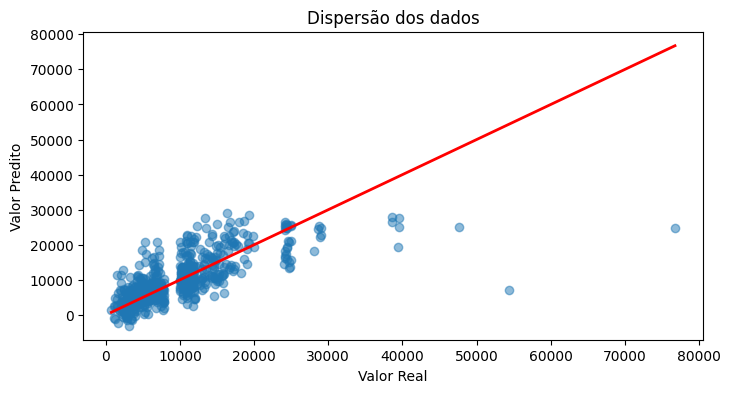

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Dispersão dos dados')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()

In [ ]:
nomes_atributos = x_train.columns

In [ ]:
nomes_atributos

Index(['IDADE', 'NAO_BRANCO', 'TEMPO EXPERIENCIA', 'INSATISFACAO',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'GENERO_Masculino',
       'GENERO_Prefiro não informar', 'SETOR_Educação',
       'SETOR_Entretenimento ou Esportes', 'SETOR_Filantropia/ONG's',
       'SETOR_Finanças ou Bancos', 'SETOR_Indústria',
       'SETOR_Internet/Ecommerce', 'SETOR_Marketing', 'SETOR_Outra Opção',
       'SETOR_Seguros ou Previdência', 'SETOR_Setor Alimentício',
       'SETOR_Setor Automotivo', 'SETOR_Setor Farmaceutico',
       'SETOR_Setor Imobiliário/ Construção Civil', 'SETOR_Setor Público',
       'SETOR_Setor de Energia', 'SETOR_Tecnologia/Fábrica de Software',
       'SETOR_Telecomunicação', 'SETOR_Varejo', 'SETOR_Área da Saúde',
       'SETOR_Área de Consultoria', 'NOVO NIVEL_Júnior', 'NOVO NIVEL_Pleno',
       'NOVO NIVEL_Sênior', 'REGIAO ONDE MORA_Nordeste',
       'REGIAO ONDE MORA_Norte', 'REGIAO ONDE MORA_Sudeste',
       'REGIAO ONDE MORA_Sul'],
      dtype='object')

In [ ]:
coefs = pd.DataFrame(model.coef_, columns=['coeficientes'], index=nomes_atributos)

In [ ]:
coefs = coefs.sort_values(by='coeficientes', ascending=False)

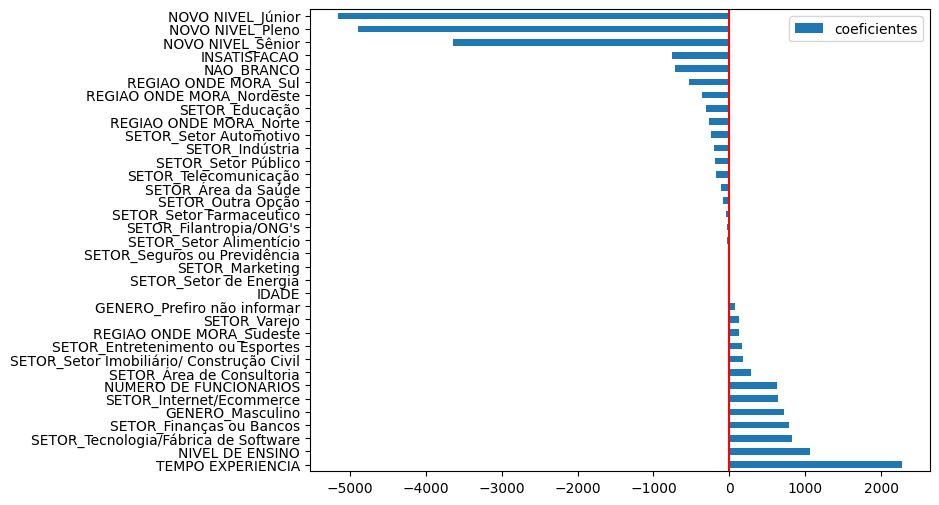

In [ ]:
coefs.plot.barh(figsize=(8,6))
plt.axvline(x=0, color='red') #
plt.show()